In [1]:
import pandas as pd
import numpy as np
import glob as glob
from src.utils.pip_pattern_miner import PIPPatternMiner

/liubinxu/liubinxu/finance/learning/src/utils/data_utils.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [6]:
data_file = "/liubinxu/liubinxu/finance/learning/data/*.qfq.kdj.parquet"

In [7]:
data_files =glob.glob(data_file)

In [8]:
data_files

['/liubinxu/liubinxu/finance/learning/data/159605.qfq.kdj.parquet',
 '/liubinxu/liubinxu/finance/learning/data/516780.qfq.kdj.parquet',
 '/liubinxu/liubinxu/finance/learning/data/561550.qfq.kdj.parquet',
 '/liubinxu/liubinxu/finance/learning/data/159766.qfq.kdj.parquet',
 '/liubinxu/liubinxu/finance/learning/data/159865.qfq.kdj.parquet',
 '/liubinxu/liubinxu/finance/learning/data/159949.qfq.kdj.parquet',
 '/liubinxu/liubinxu/finance/learning/data/159611.qfq.kdj.parquet',
 '/liubinxu/liubinxu/finance/learning/data/515700.qfq.kdj.parquet',
 '/liubinxu/liubinxu/finance/learning/data/512690.qfq.kdj.parquet',
 '/liubinxu/liubinxu/finance/learning/data/000016.qfq.kdj.parquet',
 '/liubinxu/liubinxu/finance/learning/data/510330.qfq.kdj.parquet',
 '/liubinxu/liubinxu/finance/learning/data/159928.qfq.kdj.parquet',
 '/liubinxu/liubinxu/finance/learning/data/515790.qfq.kdj.parquet',
 '/liubinxu/liubinxu/finance/learning/data/515030.qfq.kdj.parquet',
 '/liubinxu/liubinxu/finance/learning/data/51522

In [41]:
def add_kdj_type(data):
    data["k_last"] = data["K"].shift(1)
    data["K_choose"] = "none"
    data["K_choose"][(data["k_last"] < 20) & (data["K"] >= 20)] = "type1"
    data["K_choose"][(data["k_last"] > 80) & (data["K"] < 80)] = "typen"
    data["K_choose"][(data["k_last"] < 50) & (data["K"] >= 50)]= "type2"

    data_choose = data[(data["K_choose"] !="none")]
    data_choose["K_choose_last"] = data_choose["K_choose"].shift()
    data_choose["K_choose"][(data_choose["K_choose"] == "type2") & (data_choose["K_choose_last"] == "type2")] = "type3"
    data["K_choose"][data_choose.index] = data_choose["K_choose"]
    return data

In [6]:
data = add_kdj_type(data)
# data["K_pre"] = data["K"].shift()
data["signal"] = False
data["signal"][data["K_choose"]!="none"] = True
data["close480_close2880"]

NameError: name 'data' is not defined

In [238]:
data_list = list()
arrs = list()
amounts = list()
signal_chooses = list()
for data_file in data_files:
    data = pd.read_parquet(data_file)
    data = add_kdj_type(data)
    # data["K_pre"] = data["K"].shift()
    data["signal"] = False
    data["signal"][data["K_choose"].isin(["type1", "type3"])] = True
    data["signal"][data["close480_close2880"]>0] = False
    arr = data['close'].to_numpy()
    amount = data["amount_normalize20_rolling_96_mean"]
    signal_choose = data["signal"].to_numpy()
    data_list.append(data)
    arrs.append(arr)
    amounts.append(amount)
    signal_chooses.append(signal_choose)
    

In [44]:
data[data["K_choose"]=="type1"]

,open,close,high,low,vol,amount,datetime,code,date,date_stamp,...,close_rolling_480_mean_amount_normalize60_rolling_480_mean_corr_roll480,K,D,J,target_close1,target_close2,target_close5,k_last,K_choose,signal
index,,,,,,,,,,,,,,,,,,,,,
2021-05-31 09:35:00,0.995,0.997,0.998,0.994,11454100.0,11403226.0,2021-05-31 09:35:00,513180,2021-05-31,1.622390e+09,...,NaN,22.865179,13.789876,41.015786,0.013039,0.036108,0.011033,13.592061,type1,True
2021-05-31 13:55:00,0.993,0.992,0.993,0.991,8563100.0,8494544.0,2021-05-31 13:55:00,513180,2021-05-31,1.622390e+09,...,NaN,21.170497,21.562341,20.386808,0.032258,0.031250,0.011089,19.690311,type1,True
2021-06-02 13:15:00,1.024,1.025,1.025,1.024,2162700.0,2216112.0,2021-06-02 13:15:00,513180,2021-06-02,1.622563e+09,...,NaN,20.872514,21.975505,18.666531,0.001951,-0.011707,-0.031220,19.047016,type1,True
2021-06-02 14:40:00,1.022,1.024,1.024,1.022,4017400.0,4110048.0,2021-06-02 14:40:00,513180,2021-06-02,1.622563e+09,...,NaN,23.713995,23.788646,23.564693,-0.004883,-0.013672,-0.031250,18.456794,type1,True
2021-06-03 14:05:00,1.024,1.025,1.025,1.023,2873700.0,2942688.0,2021-06-03 14:05:00,513180,2021-06-03,1.622650e+09,...,NaN,22.326209,30.983631,5.011365,-0.015610,-0.022439,-0.030244,18.220022,type1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-09 14:35:00,0.503,0.504,0.504,0.502,38166600.0,19197228.0,2023-05-09 14:35:00,513180,2023-05-09,1.683562e+09,...,-0.591417,20.689580,21.501604,19.065533,-0.005952,-0.001984,NaN,17.327496,type1,False
2023-05-10 10:05:00,0.498,0.500,0.501,0.498,140530000.0,70161400.0,2023-05-10 10:05:00,513180,2023-05-10,1.683648e+09,...,-0.536231,22.656772,16.927382,34.115552,0.016000,0.030000,NaN,16.077015,type1,False
2023-05-12 09:35:00,0.514,0.514,0.516,0.513,515199904.0,264982048.0,2023-05-12 09:35:00,513180,2023-05-12,1.683821e+09,...,0.594617,25.350783,17.337472,41.377405,NaN,NaN,NaN,13.087606,type1,False


In [192]:
    data["k_last"] = data["K"].shift(1)
    data["K_choose"] = "none"
    data["K_choose"][(data["k_last"] < 20) & (data["K"] >= 20)] = "type1"
    data["K_choose"][(data["k_last"] > 80) & (data["K"] < 80)] = "typen"
    data["K_choose"][(data["k_last"] < 50) & (data["K"] >= 50)]= "type2"

    data_choose = data[(data["K_choose"] !="none")]
    data_choose["K_choose_last"] = data_choose["K_choose"].shift()
    data_choose["K_choose"][(data_choose["K_choose"] == "type2") & (data_choose["K_choose_last"] == "type2")] = "type3"

In [38]:
data["K_choose"][data_choose.index] = data_choose["K_choose"]

In [36]:
data_choose["K_choose"]

index
2021-05-25 14:35:00    typen
2021-05-25 15:00:00    type2
2021-05-26 10:45:00    type3
2021-05-27 10:05:00    type3
2021-05-27 11:20:00    type3
                       ...  
2023-05-12 09:35:00    type1
2023-05-12 09:50:00    type2
2023-05-12 13:05:00    type3
2023-05-12 14:00:00    type1
2023-05-12 14:25:00    type1
Name: K_choose, Length: 1112, dtype: object

In [40]:
data["K_choose"][data_choose.index]

index
2021-05-25 14:35:00    typen
2021-05-25 15:00:00    type2
2021-05-26 10:45:00    type3
2021-05-27 10:05:00    type3
2021-05-27 11:20:00    type3
                       ...  
2023-05-12 09:35:00    type1
2023-05-12 09:50:00    type2
2023-05-12 13:05:00    type3
2023-05-12 14:00:00    type1
2023-05-12 14:25:00    type1
Name: K_choose, Length: 1112, dtype: object

In [45]:
data[data["K_choose"].isin(["type1", "type3"])]

,open,close,high,low,vol,amount,datetime,code,date,date_stamp,...,close_rolling_480_mean_amount_normalize60_rolling_480_mean_corr_roll480,K,D,J,target_close1,target_close2,target_close5,k_last,K_choose,signal
index,,,,,,,,,,,,,,,,,,,,,
2021-05-26 10:45:00,1.008,1.009,1.009,1.007,15219200.0,15341200.0,2021-05-26 10:45:00,513180,2021-05-26,1.621958e+09,...,NaN,52.192051,37.373586,81.828981,-0.006938,-0.005946,0.019822,42.627323,type3,True
2021-05-27 10:05:00,1.007,1.007,1.007,1.005,8087100.0,8135272.0,2021-05-27 10:05:00,513180,2021-05-27,1.622045e+09,...,NaN,56.301216,40.526981,87.849687,0.000993,-0.007944,0.021847,47.561457,type3,True
2021-05-27 11:20:00,1.005,1.007,1.007,1.005,6164800.0,6201744.0,2021-05-27 11:20:00,513180,2021-05-27,1.622045e+09,...,NaN,54.153131,47.523801,67.411791,-0.004965,-0.011917,0.020854,49.428201,type3,True
2021-05-27 14:40:00,1.005,1.006,1.006,1.005,5393800.0,5426144.0,2021-05-27 14:40:00,513180,2021-05-27,1.622045e+09,...,NaN,51.879251,46.227535,63.182684,-0.015905,-0.009940,0.012922,42.255102,type3,True
2021-05-31 09:35:00,0.995,0.997,0.998,0.994,11454100.0,11403226.0,2021-05-31 09:35:00,513180,2021-05-31,1.622390e+09,...,NaN,22.865179,13.789876,41.015786,0.013039,0.036108,0.011033,13.592061,type1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-10 10:05:00,0.498,0.500,0.501,0.498,140530000.0,70161400.0,2023-05-10 10:05:00,513180,2023-05-10,1.683648e+09,...,-0.536231,22.656772,16.927382,34.115552,0.016000,0.030000,NaN,16.077015,type1,False
2023-05-12 09:35:00,0.514,0.514,0.516,0.513,515199904.0,264982048.0,2023-05-12 09:35:00,513180,2023-05-12,1.683821e+09,...,0.594617,25.350783,17.337472,41.377405,NaN,NaN,NaN,13.087606,type1,False
2023-05-12 13:05:00,0.513,0.513,0.514,0.512,31755900.0,16289119.0,2023-05-12 13:05:00,513180,2023-05-12,1.683821e+09,...,0.773156,50.339967,53.930820,43.158262,NaN,NaN,NaN,48.407960,type3,False


In [258]:
pip_miner = PIPPatternMiner(n_pips=7, lookback=960, hold_period=12, signal_choose=signal_chooses)
pip_miner.train_multi(arrs, vol=amounts, n_reps=-1)

In [3]:
import pickle
# filehandler = open("down_10d_2d", 'wb') 
# pickle.dump(pip_miner1, filehandler)

In [5]:
pip_miner = pickle.load(open("down_10d_2d", "rb"))

In [124]:
pip_miner._cluster_signals_dict = None
filehandler = open("down_10d_2d2", 'wb') 
pickle.dump(pip_miner, filehandler)

In [349]:
cluster_martins = []
nums = []
martinss = []

for clust_i in range(len(pip_miner._pip_clusters)): # Loop through each cluster
    rec = dict()
    rec2 = dict()
    martins = []
    for n, data in enumerate(data_list):
        index_code = os.path.basename(data_files[n]).split(".")[0]
        sig = pip_miner._cluster_signals_dict[clust_i][n]
#         print(len(sig))
#         print(len(data_list[n]))
        martin = data_list[n][sig == 1]["target_close5"]
#         print(martin.mean())
        martin = martin[~np.isnan(martin)]
        rec[index_code] = len(martin)
        rec2[index_code] = martin.mean()
        martins += list(martin)[0::12]
    cluster_martins.append(rec2)
    nums.append(rec)
    martinss.append(martins)
    
                
#                 print(len(martin), martin.mean())


In [8]:
pip_miner._cluster_objs

[]

In [120]:
getattr(pip_miner)

TypeError: getattr expected at least 2 arguments, got 1

In [369]:
datal = pip_miner._cluster_centers[0]

In [373]:
cls = []
[np.corrcoef(a, datal)[0][1] for a in pip_miner._cluster_centers]

[1.0,
 -0.2256220308866362,
 -0.12190527737608318,
 -0.2326486058966887,
 -0.43100594945854254,
 0.3051775778918921,
 -0.2021870060813714,
 -0.2613944952486407,
 0.216335352838315,
 -0.014716606399797934,
 0.20681403706584742,
 0.25170629083149837,
 -0.2656851715891063,
 0.07231272230101797,
 -0.10453712555650566,
 0.11907595935428547,
 -0.36610331492525644,
 -0.0025035611350813056,
 -0.22838116910903639,
 0.16437392032514764,
 -0.06456578443914568,
 -0.20066052026534945,
 0.5505534584727074,
 -0.13899893101010366,
 0.21286447481867277,
 0.029265073611402338,
 0.2955335324870373,
 0.1980439562061331,
 -0.04954069864789279,
 -0.15939799339409022,
 0.003926512357245051,
 0.37176150239257266,
 0.051019987566053804,
 -0.27822473716367774,
 0.19343147492054355,
 0.2692427516604957,
 -0.363046026564205,
 -0.24356785959070398,
 -0.5963713970185951,
 -0.17840946750807116,
 -0.202292995849432,
 -0.43546064275591007,
 0.1793165329503663,
 0.018176144253388808,
 -0.33629645034930267,
 -0.38199301

In [15]:
np.linalg.norm(np.array([1,2,3])-np.array([4,5,6]))
a = pip_miner._cluster_centers[0]
cls = []
a = [np.linalg.norm(np.array(a) - np.array(b)) for b in pip_miner._cluster_centers]

In [19]:
from scipy.stats import t

In [29]:
a= np.array(a)
mean = np.mean(a)
std_dev = np.std(a, ddof=1)
confidence_level = 0.95
degree_freedom = len(a) -1
interv = t.interval(confidence_level, degree_freedom, loc=mean, scale=std_dev/np.sqrt(len(a)))

In [32]:
mean, std_dev

(4.681235778131167, 1.1891261534704225)

In [ ]:
from scipy.stats import norm

successes = 35
total_trials = 50
sample_proportion = successes / total_trials

# 计算标准误差
std_error = np.sqrt((sample_proportion * (1 - sample_proportion)) / total_tri
als)

# 确定置信水平
confidence_level = 0.95

# 计算置信区间
confidence_interval = norm.interval(confidence_level, loc=sample_proportion
, scale=std_error)

print("Confidence interval:", confidence_interval)


In [350]:
matrinss_all = []
for mal in martinss:
    matrinss_all += mal

In [325]:
matrinss_all = np.array(matrinss_all)

In [38]:
from src.utils.kmeans import bi_kMeans

In [40]:
from numpy import mat

In [46]:
a1, a2 = bi_kMeans(mat(pip_miner._cluster_centers), k=5)

[[0.2236688185600654, -0.025609290351772642, -0.030796286068057614, 0.01606154693039524, -0.08656042987983839, 0.184246749209027, -0.2810111083998193, 0.026053458392345116, -0.03531175359350613, 0.015303780056289134, 0.010341085940979183, -0.0009437894224276499, 0.07232712856228453, -0.08776990993596427]]
sse_split, sse_nonsplit 1835.0673912748998 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  229
sse_split, sse_nonsplit 768.9223302436777 880.9099534958495
sse_split, sse_nonsplit 703.5067342975078 954.1574377790505
the bestCentToSplit is:  0
the len of bestClustAss is:  117
sse_split, sse_nonsplit 385.3692643296861 1181.3135877385903
sse_split, sse_nonsplit 703.7747731583665 768.9223302436777
sse_split, sse_nonsplit 247.8740258901871 1349.428649496786
the bestCentToSplit is:  1
the len of bestClustAss is:  112
sse_split, sse_nonsplit 392.4003060537126 1004.1784074011077
sse_split, sse_nonsplit 292.85187366412345 1117.9423718092125
sse_split, sse_nonsplit 252.9621712411539 

In [56]:
np.linalg.norm(pip_miner._cluster_centers[0] - a1[3])

2.016514079540949

In [72]:
indec = np.where([a2[:, 0] == 1])[1]

In [74]:
choose1 = mat(pip_miner._cluster_centers)[indec,]

In [81]:
np.std(choose1, axis=0)

matrix([[0.5863557 , 0.65433554, 0.79342676, 0.76213477, 0.77018097,
         0.74125563, 0.54904146, 0.80049757, 0.44822953, 0.53381163,
         0.58895457, 0.52432817, 0.43750441, 0.8661257 ]])

In [89]:
[n for n in range(0,5)]

[0, 1, 2, 3, 4]

In [82]:
dis = [np.linalg.norm(np.array(a1[1]) - np.array(b)) for b in choose1]

In [85]:
dis
np.std(dis)

0.4528960041023914

In [105]:
import sys

In [119]:
sys.getsizeof(pip_miner._)

28

In [118]:
pip_miner

In [324]:
from scipy import stats

In [98]:
from pyclustering.cluster.kmeans import kmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

In [95]:
pip_miner._cluster_centers

[[-0.9969244602168623,
  -1.4062935912545425,
  0.017875813388221334,
  -0.1450080099972147,
  1.2948188439984671,
  0.20619884734400248,
  1.029332556737922,
  0.7451747965349513,
  0.632773052163648,
  0.750570616614803,
  0.471340162843739,
  0.1327362018264496,
  -0.918840339295753,
  -1.8137544906878367],
 [0.7832712241421875,
  1.1592366298398389,
  0.6591047449092275,
  -0.0248993968029377,
  0.04154169004966587,
  -1.2284130910824027,
  -1.3898418010555837,
  -1.3237370235478156,
  -0.9273632938614074,
  -0.5581462366763651,
  -0.15480047433151675,
  0.5702762230763198,
  1.0631941785288375,
  1.3305766268119483],
 [0.4035701015135731,
  -0.6035882646801305,
  1.297681854932588,
  0.6291476498107204,
  -1.4737939912374969,
  0.35845362235551875,
  -0.6114709726947677,
  1.8145479621642613,
  0.6897132821618542,
  0.14519998209699214,
  -0.683967762432128,
  -0.7191001715037019,
  -0.621074232481843,
  -0.6253190600054355],
 [0.713102880466833,
  0.7504332668020937,
  -1.0456284

In [96]:
kmeans_instance = kmeans(pip_miner._cluster_centers, 5)

TypeError: len() of unsized object

In [99]:
        initial_centers = kmeans_plusplus_initializer(pip_miner._cluster_centers, 5).initialize()
        kmeans_instance = kmeans(pip_miner._cluster_centers, initial_centers)
        kmeans_instance.process()

In [100]:
pip_clusters = kmeans_instance.get_clusters()
cluster_centers = kmeans_instance.get_centers()

In [103]:
len(pip_clusters)

5

In [351]:
u = np.mean(matrinss_all)
std = np.std(matrinss_all)

In [353]:
stats.kstest(matrinss_all, 'norm', (u, std))

KstestResult(statistic=0.03724187493320685, pvalue=2.82690615189105e-15, statistic_location=0.030050855293574055, statistic_sign=1)

In [352]:
matrinss_all, u, std

([-0.015968527956549166,
  -0.02054442732409549,
  -0.005243445692883726,
  0.017087062652562983,
  0.0151394422310758,
  -0.024955436720142617,
  0.013396375098502859,
  -0.017051153460391405,
  0.01504230648699956,
  0.031250000000002894,
  0.036649214659687214,
  -0.005995203836932843,
  0.02372034956304476,
  0.020329945009165133,
  -0.011196228638782385,
  0.01306687163720225,
  -0.031476997578692656,
  -0.035107587768966095,
  -0.022907488986784182,
  0.020356234096695798,
  -0.005037783375311194,
  -0.01840490797545475,
  -0.02664298401420932,
  -0.046099290780141716,
  -0.013590033975084388,
  0.07084019769357495,
  0.09953239812959212,
  -0.00378583017847658,
  0.07082002129925374,
  -0.020833333333328825,
  0.06500000000000379,
  -0.04201546012714358,
  -0.008455718736092428,
  -0.018834080717488707,
  0.015366772977678106,
  -0.0011785503830318725,
  0.012672811059907925,
  -0.02549965541006212,
  -0.013231197771587731,
  -0.03794799718903729,
  -0.006830601092896185,
  -0.0

In [338]:
martinss

[[-0.015968527956549166,
  -0.02054442732409549,
  -0.005243445692883726,
  0.017087062652562983,
  0.0151394422310758,
  -0.024955436720142617,
  0.013396375098502859,
  -0.017051153460391405,
  0.01504230648699956,
  0.031250000000002894,
  0.036649214659687214,
  -0.005995203836932843,
  0.02372034956304476,
  0.020329945009165133,
  -0.011196228638782385,
  0.01306687163720225,
  -0.031476997578692656,
  -0.035107587768966095,
  -0.022907488986784182,
  0.020356234096695798,
  -0.005037783375311194,
  -0.01840490797545475,
  -0.02664298401420932,
  -0.046099290780141716],
 [-0.013590033975084388,
  0.07084019769357495,
  0.09953239812959212,
  -0.00378583017847658,
  0.07082002129925374,
  -0.020833333333328825,
  0.06500000000000379,
  -0.04201546012714358,
  -0.008455718736092428,
  -0.018834080717488707,
  0.015366772977678106,
  -0.0011785503830318725,
  0.012672811059907925,
  -0.02549965541006212,
  -0.013231197771587731,
  -0.03794799718903729,
  -0.006830601092896185,
  -0.

In [354]:
from scipy.stats import wilcoxon

In [355]:
statistic, p_value = wilcoxon(matrinss_all, martinss[0])

ValueError: The samples x and y must have the same length.

In [356]:
from scipy.stats import mannwhitneyu

In [357]:
statistic, p_value = mannwhitneyu(matrinss_all, martinss[0])

In [96]:
pip_miner._cluster_signals_dict

{0: [array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]

In [361]:
mannwhitneyu_p = []
for m in martinss:
    statistic, p_value = mannwhitneyu(matrinss_all, m)
    mannwhitneyu_p.append(p_value)

In [367]:
?mannwhitneyu

In [359]:
statistic

155266.0

In [50]:
import os
from matplotlib import pyplot as plt

In [15]:
os.path.basename(data_files[1]).split(".")[0]

'516780'

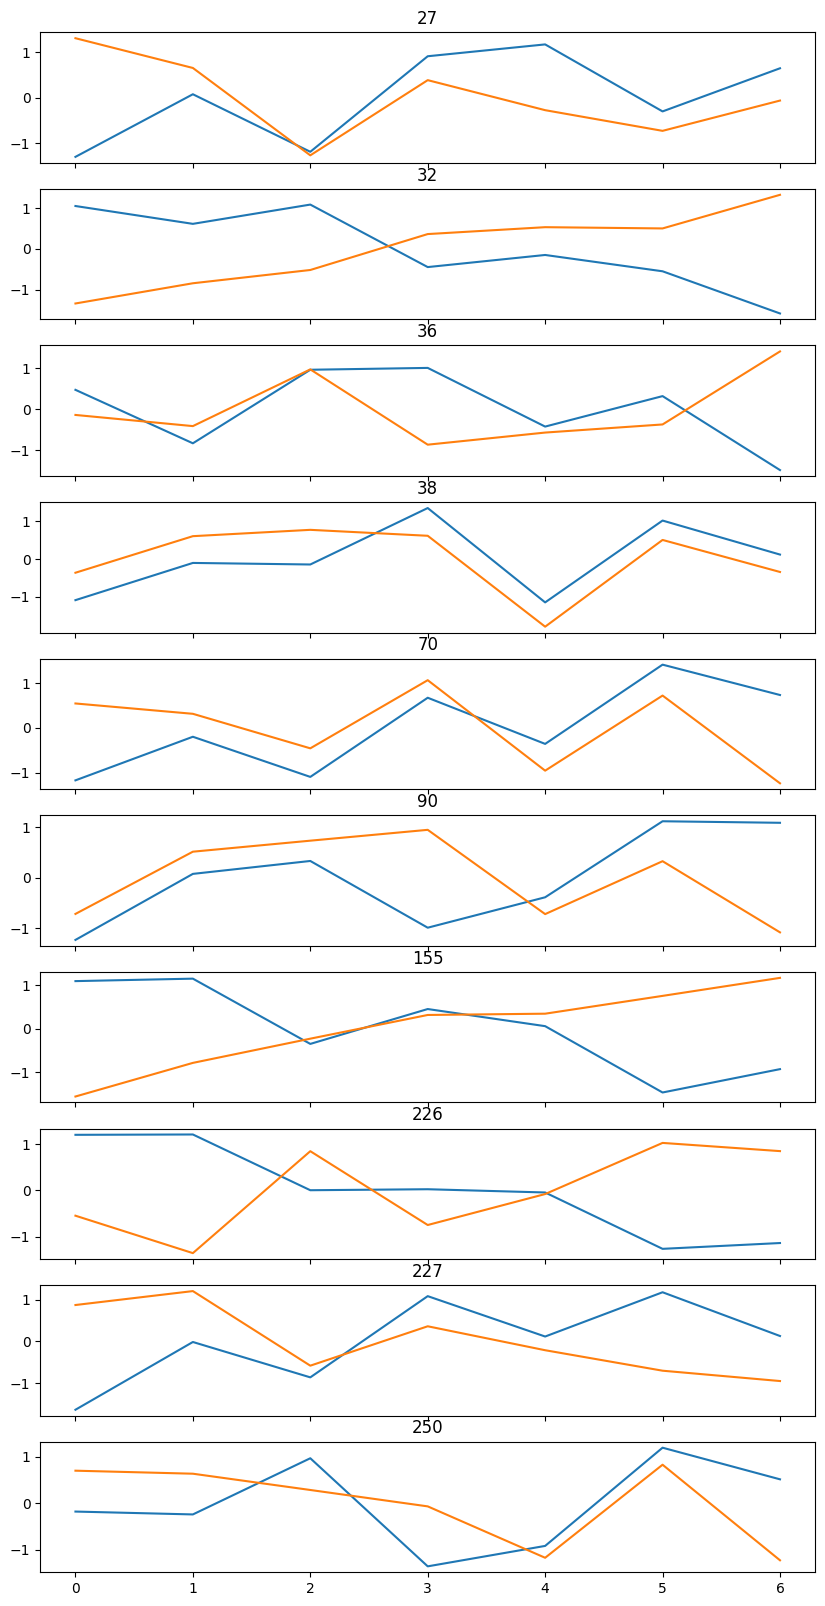

In [276]:
ks = dd[dd>0.02].index
plt.rcParams["figure.figsize"] = (10,20)
fig, axs = plt.subplots(len(ks), sharex=True)
for n, k in enumerate(ks):
    axs[n].plot(pip_miner._cluster_centers[k][:7])
    axs[n].plot(pip_miner._cluster_centers[k][7:])
    axs[n].set_title(k)
# indexea = [pip_miner._unique_pip_indices[x] for x in pip_miner._pip_clusters[k]]
# data.iloc[indexea]

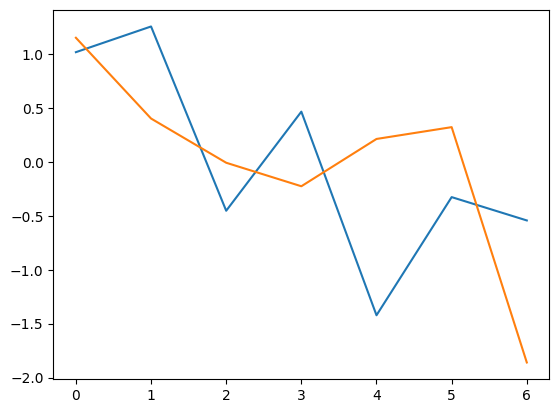

In [161]:
k = 44
plt.plot(pip_miner._cluster_centers[k][:7])
plt.plot(pip_miner._cluster_centers[k][7:])

In [159]:
len(pip_miner._cluster_centers)

246

In [269]:
df1 = pd.DataFrame(cluster_martins)

In [270]:
df2 = pd.DataFrame(nums)

In [275]:
df2.iloc[dd[dd>0.02].index].apply(sum, axis=1)

27      312
32     1056
36      540
38      420
70      509
90      287
155     960
226     564
227     540
250     462
dtype: int64

In [271]:
df1.apply(np.mean, axis=1)

0     -0.005205
1      0.010261
2     -0.004739
3     -0.000470
4      0.006716
         ...   
273   -0.004886
274   -0.005545
275   -0.000921
276   -0.000428
277    0.015874
Length: 278, dtype: float64

In [362]:
df_stat = pd.DataFrame(df1.apply(np.mean, axis=1))

In [272]:
dd = df1.apply(np.mean, axis=1)

In [363]:
df_stat.columns = ["target_mean"]

In [364]:
df_stat["target_num"] = df2.apply(sum, axis=1)
df_stat["target_sum"]  = df_stat["target_mean"] * df_stat["target_num"] /12
df_stat["mannwhitneyu_p"] = mannwhitneyu_p
df_stat["clusters"] = df_stat.index
df_stat["num_sum"] = df_stat["target_num"].cumsum()/12
df_stat["target_sum_sum"] = df_stat["target_sum"].cumsum()
df_stat = df_stat.sort_values(by=["target_mean"], ascending=False)
df_stat

,target_mean,target_num,target_sum,mannwhitneyu_p,clusters,num_sum,target_sum_sum
27,0.039731,312,1.032997,8.352853e-06,27,1253.916667,-1.169041
227,0.037780,540,1.700085,1.960380e-01,227,10229.083333,-4.704531
250,0.035159,462,1.353634,1.215806e-08,250,11258.083333,-5.076281
70,0.034902,509,1.480447,6.038972e-05,70,3183.833333,2.166237
38,0.032344,420,1.132032,1.171662e-08,38,1674.916667,2.672827
...,...,...,...,...,...,...,...
31,-0.025634,396,-0.845932,1.347154e-03,31,1372.916667,-1.896236
131,-0.025713,504,-1.079938,6.804817e-04,131,5935.500000,-4.931008
186,-0.026534,595,-1.315647,2.362648e-06,186,8564.583333,-3.074321
63,-0.026784,588,-1.312428,4.601008e-03,63,2861.833333,1.278390


In [366]:
df_stat = df_stat.sort_values(by=["mannwhitneyu_p"])
df_stat[:20]

,target_mean,target_num,target_sum,mannwhitneyu_p,clusters,num_sum,target_sum_sum
38,0.032344,420,1.132032,1.171662e-08,38,1674.916667,2.672827
250,0.035159,462,1.353634,1.215806e-08,250,11258.083333,-5.076281
186,-0.026534,595,-1.315647,2.362648e-06,186,8564.583333,-3.074321
27,0.039731,312,1.032997,8.352853e-06,27,1253.916667,-1.169041
155,0.024435,960,1.954766,4.208606e-05,155,7019.500000,1.138190
70,0.034902,509,1.480447,6.038972e-05,70,3183.833333,2.166237
151,0.019342,732,1.179875,1.285975e-04,151,6792.583333,-1.608574
232,-0.011965,972,-0.969158,1.308675e-04,232,10479.083333,-7.097656
40,0.008607,1159,0.831312,1.720285e-04,40,1837.500000,3.852908
226,0.021282,564,1.000266,2.054607e-04,226,10184.083333,-6.404616


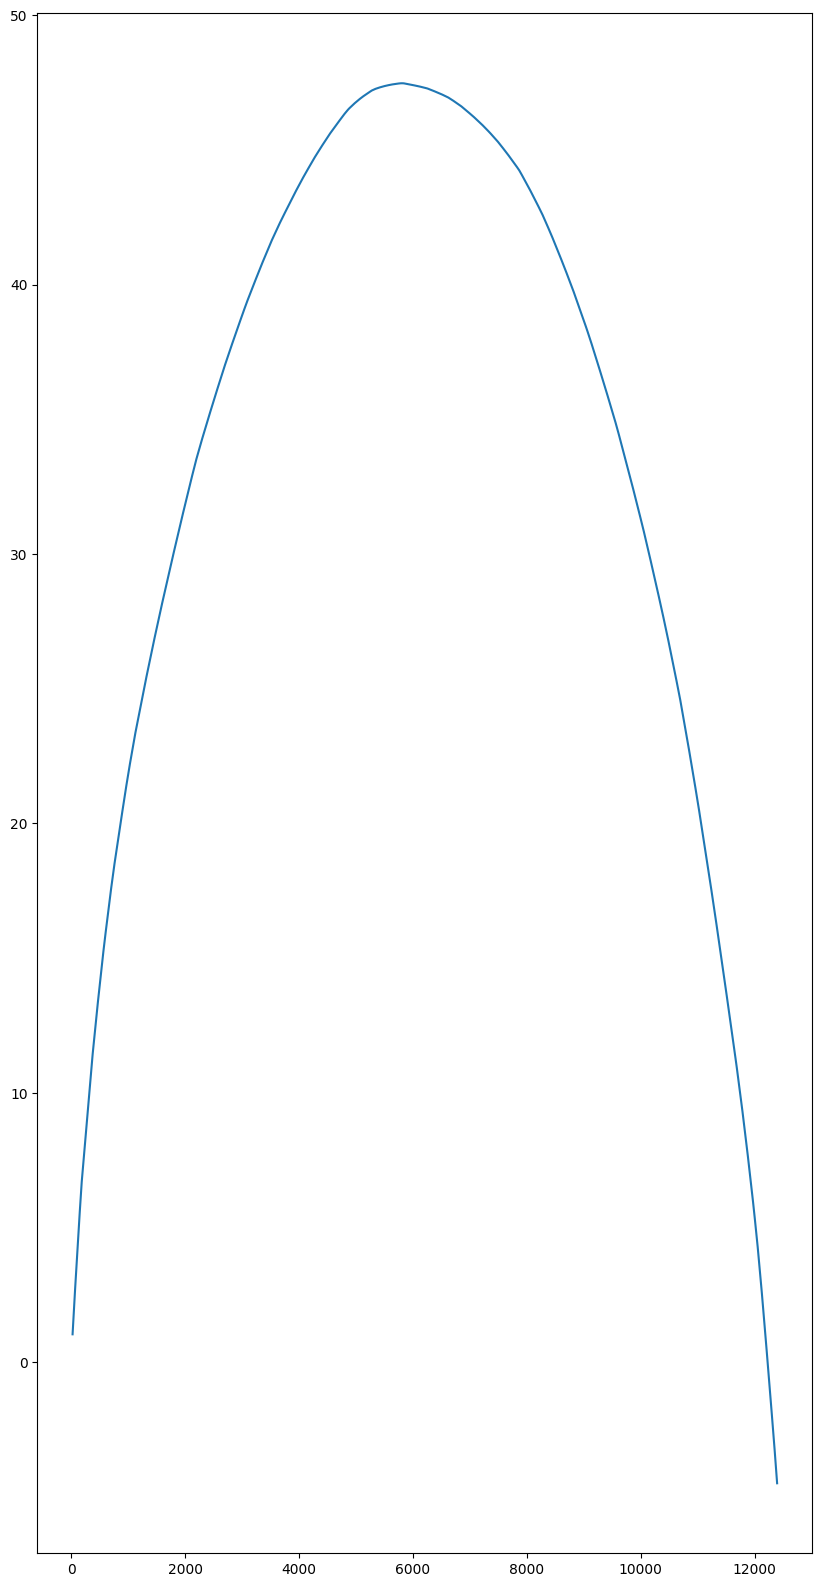

In [310]:
fig, ax1 = plt.subplots(1,1, sharex=True)
# datac = data[:5000]
ax1.plot(df_stat["num_sum"], df_stat["target_sum_sum"])

In [315]:
df_stat["target_num"].cumsum()/12

27        26.000000
227       71.000000
250      109.500000
70       151.916667
38       186.916667
           ...     
31     12209.000000
131    12251.000000
186    12300.583333
63     12349.583333
214    12393.583333
Name: target_num, Length: 278, dtype: float64

In [297]:
?df_stat.sort_values

In [128]:
cluster_martins = []
nums = []
for clust_i in [170]: # Loop through each cluster
    rec = dict()
    rec2 = dict()
    for n, data in enumerate(data_list):
        index_code = os.path.basename(data_files[n]).split(".")[0]
        sig = pip_miner1._cluster_signals_dict[clust_i][n]
#         print(len(sig))
#         print(len(data_list[n]))
        martin = data_list[n][sig == 1]["target_close2"]
        print(index_code)
        print(martin.mean())
        print(data_list[n][sig == 1][1::6])


159605
nan
Empty DataFrame
Columns: [open, close, high, low, vol, amount, datetime, code, date, date_stamp, time_stamp, type, volume, suogu, preclose, adj, amount_48_seasonal_rolling_20_mean, amount_48_seasonal_rolling_20_std, amount_48_seasonal_rolling_5_mean, amount_48_seasonal_rolling_5_std, amount_48_seasonal_rolling_60_mean, amount_48_seasonal_rolling_60_std, amount_normalize5, amount_normalize20, amount_normalize60, close_rolling_6_mean, close_rolling_6_std, close_rolling_6_std_mean, close_rolling_24_mean, close_rolling_24_std, close_rolling_24_std_mean, close_rolling_96_mean, close_rolling_96_std, close_rolling_96_std_mean, close_rolling_480_mean, close_rolling_480_std, close_rolling_480_std_mean, close_rolling_2880_mean, close_rolling_2880_std, close_rolling_2880_std_mean, amount_normalize5_rolling_24_mean, amount_normalize5_rolling_24_std, amount_normalize5_rolling_24_std_mean, amount_normalize5_rolling_96_mean, amount_normalize5_rolling_96_std, amount_normalize5_rolling_96_st

Empty DataFrame
Columns: [open, close, high, low, vol, amount, datetime, code, date, date_stamp, time_stamp, type, volume, suogu, preclose, adj, amount_48_seasonal_rolling_20_mean, amount_48_seasonal_rolling_20_std, amount_48_seasonal_rolling_5_mean, amount_48_seasonal_rolling_5_std, amount_48_seasonal_rolling_60_mean, amount_48_seasonal_rolling_60_std, amount_normalize5, amount_normalize20, amount_normalize60, close_rolling_6_mean, close_rolling_6_std, close_rolling_6_std_mean, close_rolling_24_mean, close_rolling_24_std, close_rolling_24_std_mean, close_rolling_96_mean, close_rolling_96_std, close_rolling_96_std_mean, close_rolling_480_mean, close_rolling_480_std, close_rolling_480_std_mean, close_rolling_2880_mean, close_rolling_2880_std, close_rolling_2880_std_mean, amount_normalize5_rolling_24_mean, amount_normalize5_rolling_24_std, amount_normalize5_rolling_24_std_mean, amount_normalize5_rolling_96_mean, amount_normalize5_rolling_96_std, amount_normalize5_rolling_96_std_mean, amo

In [55]:
data_list[n][sig == 1][1::12]

,open,close,high,low,vol,amount,datetime,code,date,date_stamp,...,close_rolling_480_mean_amount_normalize60_rolling_480_mean_corr_roll480,K,D,J,target_close1,target_close2,target_close5,k_last,K_choose,signal
index,,,,,,,,,,,,,,,,,,,,,
2021-12-07 09:55:00,0.721,0.722,0.723,0.720,26424300.0,19064888.0,2021-12-07 09:55:00,513180,2021-12-07,1.638806e+09,...,-0.992743,57.165148,34.498631,102.498182,0.023546,0.031856,0.020776,50.820400,none,False
2021-12-09 14:35:00,0.749,0.748,0.749,0.747,7870300.0,5886912.0,2021-12-09 14:35:00,513180,2021-12-09,1.638979e+09,...,-0.990461,24.768760,28.642838,17.020603,-0.008021,0.002674,-0.048128,23.055845,none,False
2021-12-10 10:05:00,0.751,0.752,0.752,0.750,11894900.0,8938832.0,2021-12-10 10:05:00,513180,2021-12-10,1.639066e+09,...,-0.988889,75.853246,56.008388,115.542963,0.007979,-0.023936,-0.058511,71.023895,none,False
2021-12-10 14:35:00,0.743,0.742,0.743,0.742,14419600.0,10699744.0,2021-12-10 14:35:00,513180,2021-12-10,1.639066e+09,...,-0.976844,12.975490,18.387701,2.151069,0.010782,-0.020216,-0.052561,15.570588,none,False
2021-12-13 10:15:00,0.757,0.757,0.758,0.756,38388800.0,29059664.0,2021-12-13 10:15:00,513180,2021-12-13,1.639325e+09,...,-0.967951,76.615839,54.772481,120.302553,-0.029062,-0.040951,-0.073976,74.291947,none,False
2021-12-14 13:20:00,0.730,0.729,0.730,0.729,1166900.0,851456.0,2021-12-14 13:20:00,513180,2021-12-14,1.639411e+09,...,-0.917670,23.966942,20.176544,31.547738,-0.009602,-0.028807,-0.060357,25.903187,none,False
2022-03-11 13:35:00,0.507,0.512,0.512,0.506,66701000.0,33959000.0,2022-03-11 13:35:00,513180,2022-03-11,1.646928e+09,...,-0.974257,60.518780,33.464983,114.626374,-0.041016,-0.103516,0.042969,52.622536,none,False
2022-03-14 10:00:00,0.499,0.498,0.500,0.497,83149600.0,41442196.0,2022-03-14 10:00:00,513180,2022-03-14,1.647187e+09,...,-0.972563,38.827529,61.616046,-6.749505,-0.092369,-0.080321,0.102410,44.285342,none,False
2022-03-15 10:40:00,0.471,0.472,0.479,0.471,196345104.0,93294048.0,2022-03-15 10:40:00,513180,2022-03-15,1.647274e+09,...,-0.968120,42.030714,30.580087,64.931969,-0.031780,0.125000,0.150424,38.241735,none,False


In [72]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True)
datac = data[:5000]
ax1.plot(datac["datetime"], datac["close"], label=2)
# ax.plot(datac["datetime"], datac["close"].rolling(24, min_periods=1).mean(), label=2)
ax1.plot(datac["datetime"], datac["close_rolling_24_mean"], label=2)
ax1.plot(datac["datetime"], datac["close_rolling_96_mean"], label=2)

Error in callback <function _draw_all_if_interactive at 0x7f2955468e50> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f2901f2ea60> (for post_execute):


KeyboardInterrupt: 

(array([-480.,    0.,  480.,  960., 1440., 1920., 2400., 2880., 3360.,
        3840., 4320., 4800., 5280.]),
 [Text(-480.0, 0, ''),
  Text(0.0, 0, '2021-03-11 09:40:00'),
  Text(480.0, 0, '2021-03-25 09:40:00'),
  Text(960.0, 0, '2021-04-09 09:40:00'),
  Text(1440.0, 0, '2021-04-23 09:40:00'),
  Text(1920.0, 0, '2021-05-12 09:40:00'),
  Text(2400.0, 0, '2021-05-26 09:40:00'),
  Text(2880.0, 0, '2021-06-09 09:40:00'),
  Text(3360.0, 0, '2021-06-24 09:40:00'),
  Text(3840.0, 0, '2021-07-08 09:40:00'),
  Text(4320.0, 0, '2021-07-22 09:40:00'),
  Text(4800.0, 0, '2021-08-05 09:40:00'),
  Text(5280.0, 0, '')])

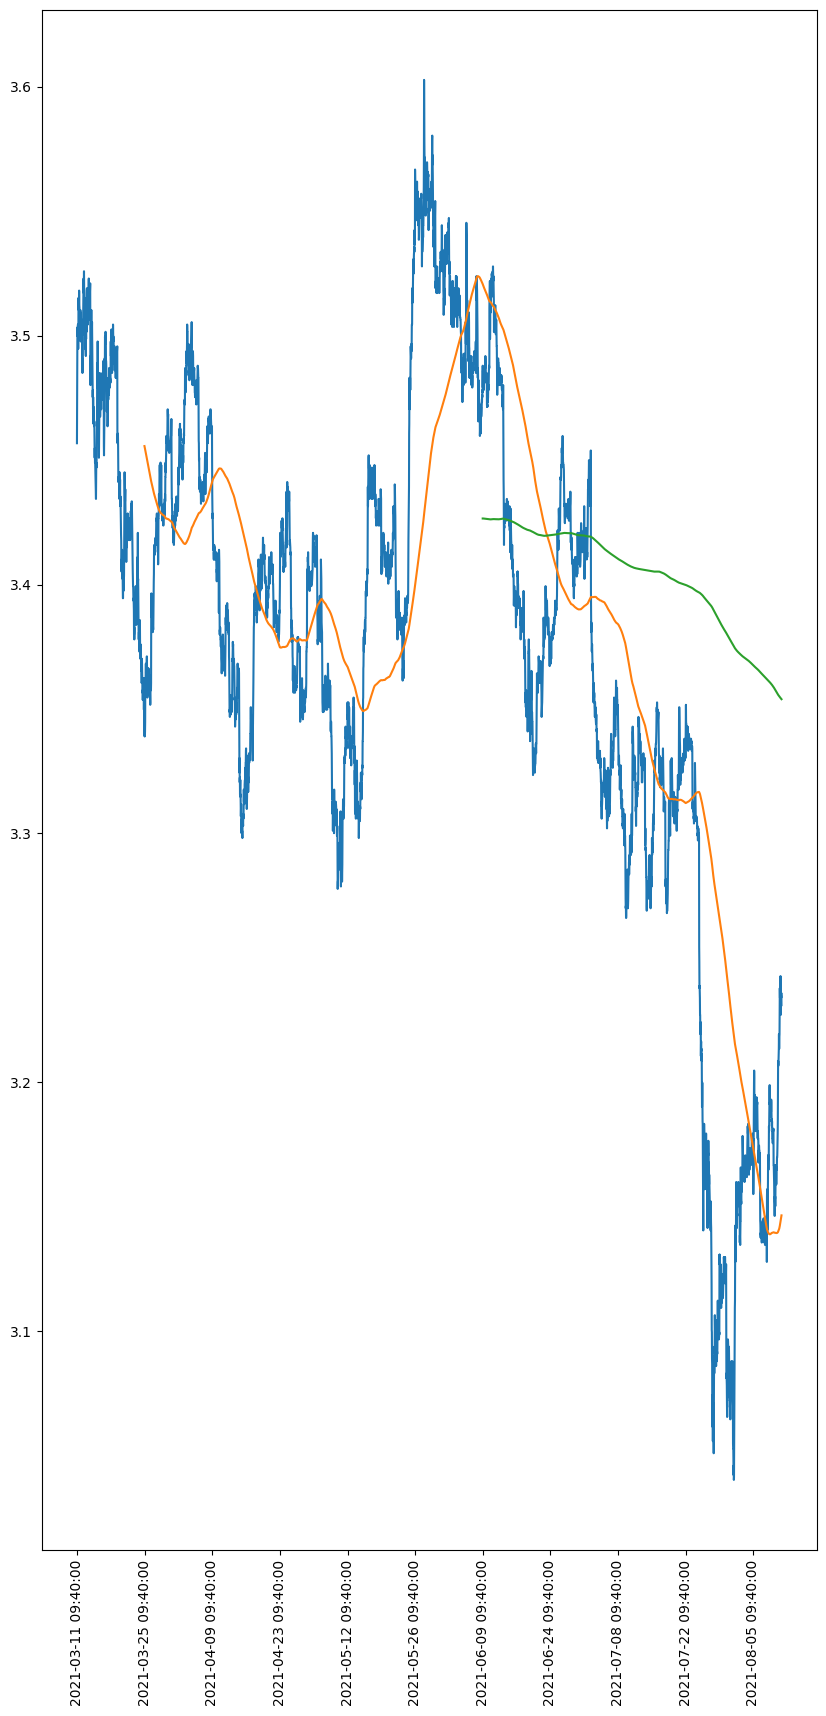

In [277]:
data = pd.read_parquet("/liubinxu/liubinxu/finance/learning/data/510050.qfq.kdj.parquet")
import matplotlib.ticker as ticker
fig, ax1 = plt.subplots(1,1, sharex=True)
datac = data[:5000]
ax1.plot(datac["datetime"], datac["close"], label=2)
# ax.plot(datac["datetime"], datac["close"].rolling(24, min_periods=1).mean(), label=2)
ax1.plot(datac["datetime"], datac["close_rolling_480_mean"], label=2)
ax1.plot(datac["datetime"], datac["close_rolling_2880_mean"], label=2)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=480))
plt.xticks(rotation=90)

In [313]:
print(list(data.columns))

['open', 'close', 'high', 'low', 'vol', 'amount', 'datetime', 'code', 'date', 'date_stamp', 'time_stamp', 'type', 'volume', 'suogu', 'preclose', 'adj', 'amount_48_seasonal_rolling_20_mean', 'amount_48_seasonal_rolling_20_std', 'amount_48_seasonal_rolling_5_mean', 'amount_48_seasonal_rolling_5_std', 'amount_48_seasonal_rolling_60_mean', 'amount_48_seasonal_rolling_60_std', 'amount_normalize5', 'amount_normalize20', 'amount_normalize60', 'close_rolling_6_mean', 'close_rolling_6_std', 'close_rolling_6_std_mean', 'close_rolling_6_exp_mean', 'close_rolling_24_mean', 'close_rolling_24_std', 'close_rolling_24_std_mean', 'close_rolling_24_exp_mean', 'close_rolling_96_mean', 'close_rolling_96_std', 'close_rolling_96_std_mean', 'close_rolling_96_exp_mean', 'close_rolling_480_mean', 'close_rolling_480_std', 'close_rolling_480_std_mean', 'close_rolling_480_exp_mean', 'close_rolling_2880_mean', 'close_rolling_2880_std', 'close_rolling_2880_std_mean', 'close_rolling_2880_exp_mean', 'amount_normalize

In [88]:
data["close480_close2880"][10000:10020]

index
2022-03-31 11:00:00   -0.078281
2022-03-31 11:05:00   -0.078190
2022-03-31 11:10:00   -0.078098
2022-03-31 11:15:00   -0.078008
2022-03-31 11:20:00   -0.077917
2022-03-31 11:25:00   -0.077824
2022-03-31 11:30:00   -0.077733
2022-03-31 13:05:00   -0.077643
2022-03-31 13:10:00   -0.077554
2022-03-31 13:15:00   -0.077463
2022-03-31 13:20:00   -0.077375
2022-03-31 13:25:00   -0.077286
2022-03-31 13:30:00   -0.077198
2022-03-31 13:35:00   -0.077110
2022-03-31 13:40:00   -0.077023
2022-03-31 13:45:00   -0.076935
2022-03-31 13:50:00   -0.076850
2022-03-31 13:55:00   -0.076764
2022-03-31 14:00:00   -0.076681
2022-03-31 14:05:00   -0.076593
Name: close480_close2880, dtype: float64

In [10]:
cluster_martins = []
nums = []
for clust_i in range(len(pip_miner2._pip_clusters)): # Loop through each cluster
    rec = dict()
    rec2 = dict()
    for n, data in enumerate(data_list):
        index_code = os.path.basename(data_files[n]).split(".")[0]
        sig = pip_miner2._cluster_signals_dict[clust_i][n]
#         print(len(sig))
#         print(len(data_list[n]))
        martin = data_list[n][sig == 1]["target_close5"]
#         print(martin.mean())
        rec[index_code] = len(martin)
        rec2[index_code] = martin.mean()
    cluster_martins.append(rec2)
    nums.append(rec)

In [164]:
cluster_martins

[{'159605': nan,
  '516780': 0.06954967378381928,
  '561550': 0.003276191482299797,
  '159766': nan,
  '159865': -0.02221331190699349,
  '159949': 0.015711746704012243,
  '159611': nan,
  '515700': -0.037428007697662136,
  '512690': nan,
  '000016': nan,
  '510330': nan,
  '159928': -0.007749086927987031,
  '515790': -0.01639313102727298,
  '515030': 0.030163432871880922,
  '515220': nan,
  '588080': 0.007518910975993193,
  '159920': 0.029883307427435876,
  '512010': -0.00644754780484111,
  '159995': 0.07438380470058552,
  '512100': -0.012093641381033892,
  '510050': -0.0003464984910528583,
  '159745': 0.037710143376330316,
  '159915': nan,
  '510900': 0.10701969840159553,
  '512200': nan,
  '512500': nan,
  '515210': -0.006406018415319016,
  '159996': -0.006218441845698718,
  '513100': -0.014812670922235855,
  '561300': nan,
  '510500': nan,
  '512170': nan,
  '511380': 0.012338415944569288,
  '588050': nan,
  '516160': nan,
  '515050': nan,
  '512290': nan,
  '512070': nan,
  '512400

In [166]:
len(pip_miner2._pip_clusters)

293